# Project Title: Chicago Crime Classification 2019 
In this project, machine learning (ML) concepts were implemented for determining the severity of the crime and also for the classification of the crimes. The ML algorithms that were implemented are:
<ol>
<li>K-Nearest Neighbor (KNN)</li>
<li>Logistic Regression</li>
<li>Support Vector Machine</li>
<li>KMeans clustering</li>    
</ol> Among these 4 algorithms, K-Nearest Neighbor, Logistic Regression and Support Vector Machine are supervised learning and KMeans clustering is unsupervised learning. The reason and the significance for using each of these algorithms are described in the appropriate sections of this notebook.

The dataset that we are working with is mainly an imbalanced dataset. So, like any rare case prediction, implementing ML algorithms to classify crimes is difficult. 

Throught this notebook, each section is described before the implementation of the codes.
         

### Importing Python Libraries

For data analysis and data visualization, we are using pandas, numpy, seaborn and matplotlib library for this project

In [2]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import os

### Importing Dataset 

In this section the crime dataset is being imported using the "read_csv" command of pandas dataframe. The dataset is in comma separated value (csv) form having 227080 rows and 22 columns.  

In [3]:
df = pd.read_csv('crimes.csv')
print(df.shape)
df.head()

(227080, 22)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11893090,JC512409,11/16/2019 4:30,008XX N MICHIGAN AVE,910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,42.0,8.0,7,1177311.0,1905834.0,2019,11/23/2019 15:51,41.896944,-87.624206,"(41.896943556, -87.624206307)"
1,11893417,JC512836,11/16/2019 13:15,092XX S PEORIA ST,486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,21.0,73.0,08B,1171937.0,1843586.0,2019,11/23/2019 15:51,41.726249,-87.645773,"(41.726249002, -87.645773171)"
2,11893710,JC513242,11/16/2019 18:45,001XX N CENTRAL AVE,820,THEFT,$500 AND UNDER,SIDEWALK,False,False,...,29.0,25.0,6,1139022.0,1900588.0,2019,11/23/2019 15:51,41.883330,-87.764965,"(41.883330195, -87.764964695)"
3,11893969,JC513665,11/16/2019 0:00,019XX E 74TH ST,5001,OTHER OFFENSE,OTHER CRIME INVOLVING PROPERTY,STREET,False,False,...,8.0,43.0,26,1190206.0,1856283.0,2019,11/23/2019 15:51,41.760671,-87.578445,"(41.760670836, -87.578445062)"
4,11894240,JC514029,11/16/2019 16:30,029XX N BROADWAY,890,THEFT,FROM BUILDING,DEPARTMENT STORE,False,False,...,44.0,6.0,6,1171737.0,1919996.0,2019,11/23/2019 15:51,41.935929,-87.644261,"(41.935929385, -87.644260642)"


### Checking columns and number of NaN values


Before implementing ML algorithm, we need to make sue our dataset is free from NaN values. In this section, we are just checking the total number of NaN values in different columns.

In [4]:
df.columns
df_null_counting =df
print(df_null_counting.isnull().sum())

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     842
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      11
Community Area             3
FBI Code                   0
X Coordinate            1129
Y Coordinate            1129
Year                       0
Updated On                 0
Latitude                1129
Longitude               1129
Location                1129
dtype: int64


### Counting the number of different crimes


One of the noticing thing in this project is the extensive use of pandas library. In this part of the project we are visualizing the crime rates for all the crimes listed inside the "Primary Type" column. 

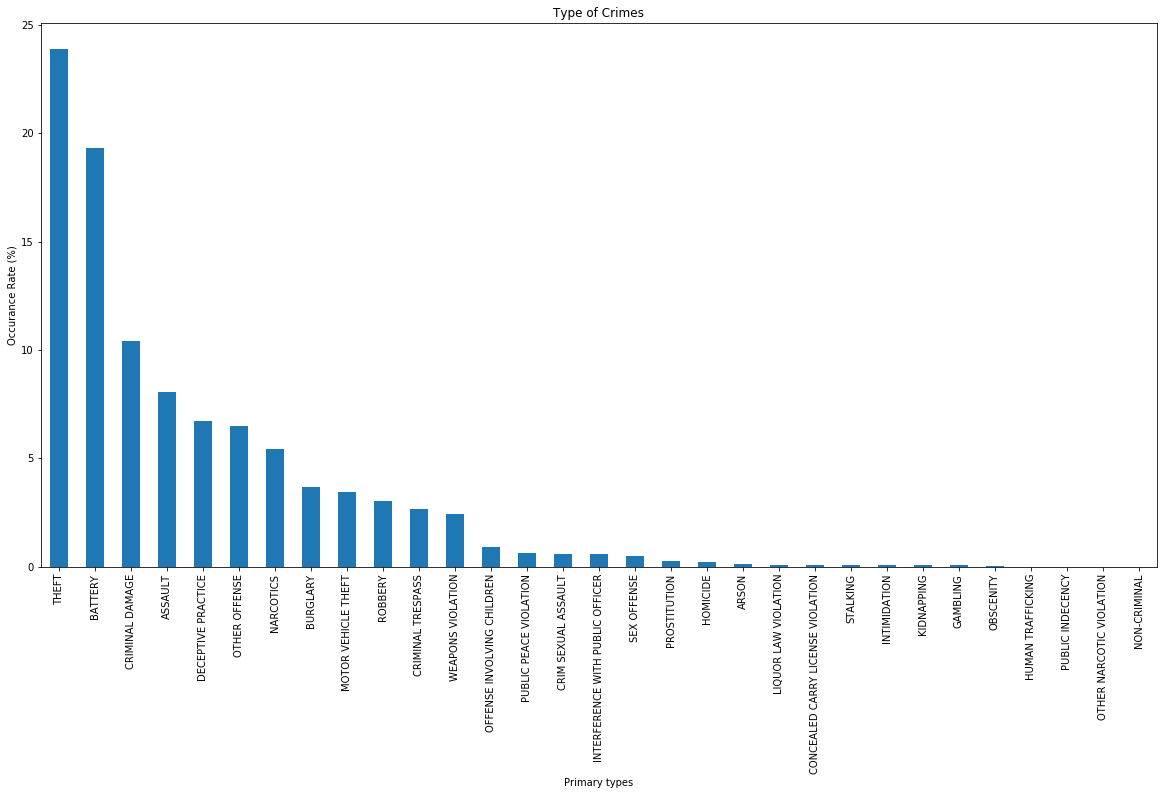

In [5]:
df_crime_type = df.groupby('Primary Type')['Primary Type'].count()/len(df)*100
df_crime_type.sort_values(ascending=False, inplace = True)
plt.rcParams["figure.figsize"] = (20,10)
df_crime_type.plot(kind = 'bar', title = 'Type of Crimes')
plt.ylabel('Occurance Rate (%)')
plt.xlabel('Primary types')
plt.show()

### Crime locations and their percentate values


Similar to the previous section, crime occurance rate at different place has been plotted. But, one extra thing that has been added here is that, if crime location place where the occurance rate is less than 1%, it has been deducted from the bar chart.

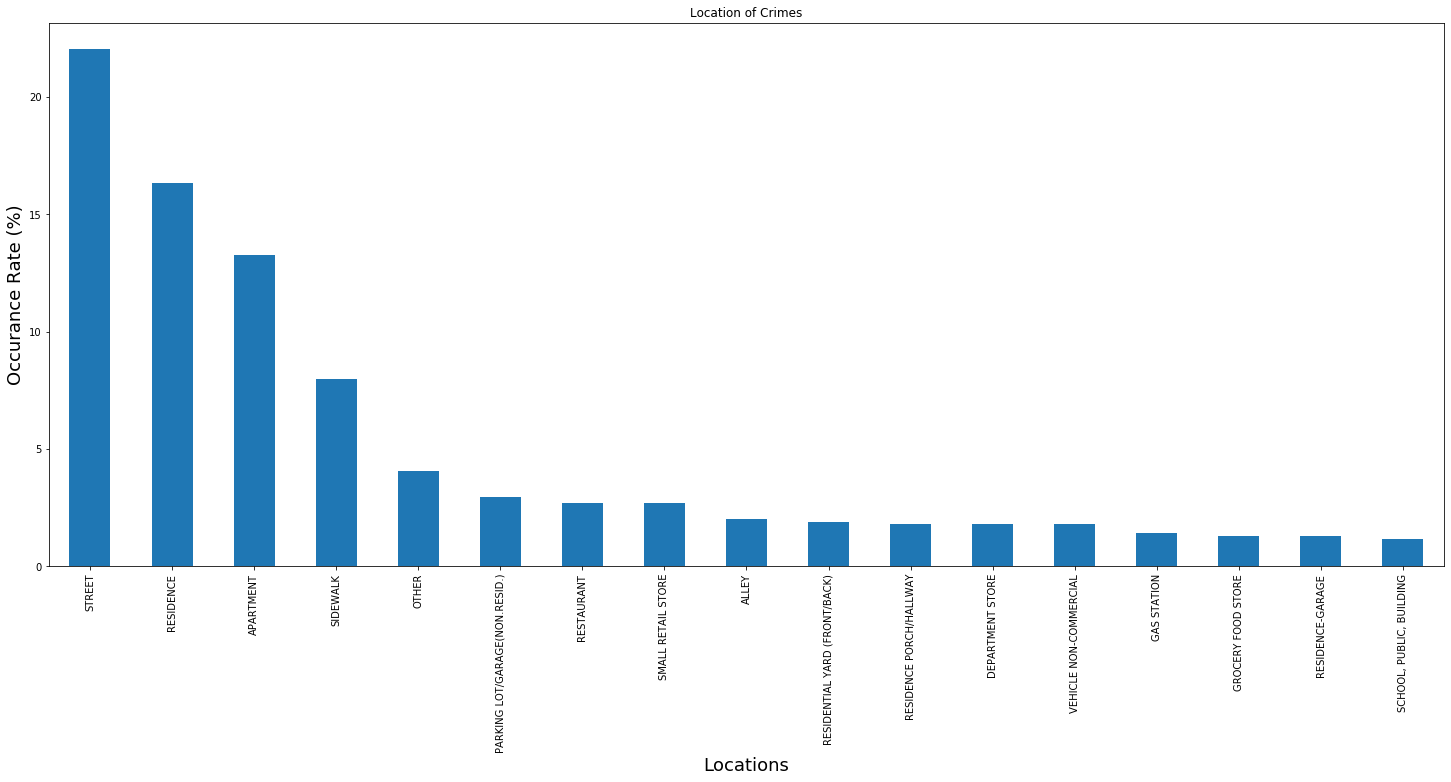

In [6]:
df_crime_location = df.groupby('Location Description')['Location Description'].count()/len(df)*100
df_crime_location2 = df_crime_location>1
df_crime_location3 = df_crime_location[df_crime_location2]
df_crime_location3.sort_values(ascending=False, inplace=True)
plt.rcParams["figure.figsize"] = (25,10)
df_crime_location3.plot(kind = 'bar', title = 'Location of Crimes')
plt.xlabel('Locations', fontsize=18)
plt.ylabel('Occurance Rate (%)', fontsize=18)
plt.show()

In [7]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

### Crime rate at different community area

The following bar chart is the crime occurance rate at different community area. Again, occurance rate below 0.5% has been drooped from the chart.

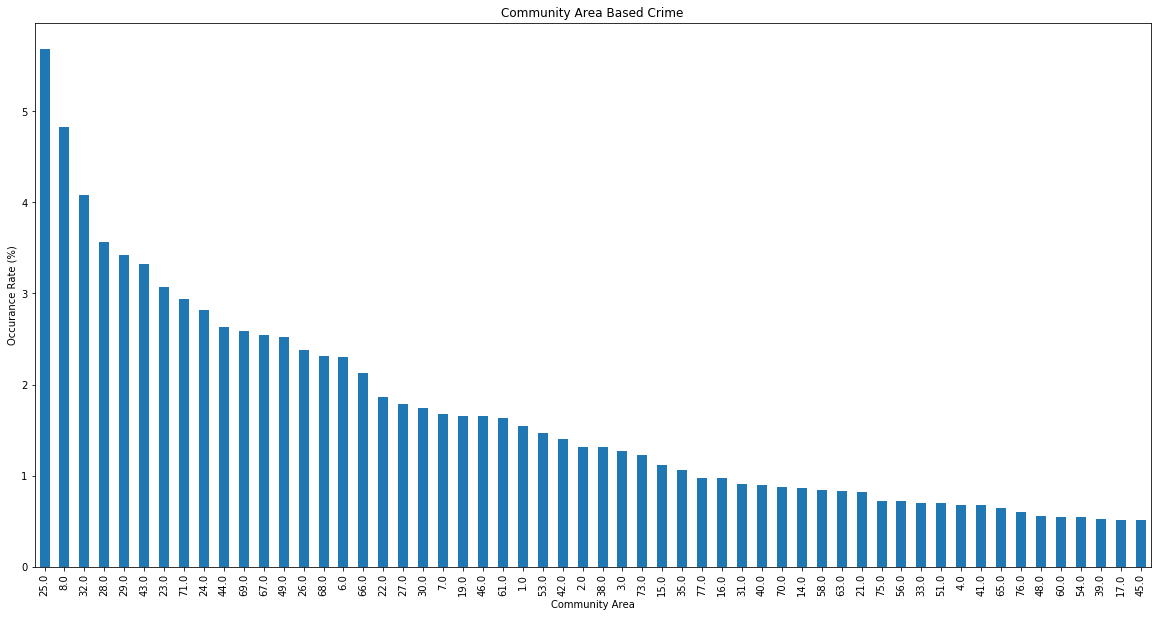

In [8]:
df_community_area = df.groupby('Community Area')['Community Area'].count()/len(df)*100
df_community_area2 = df_community_area>0.5
df_community_area3 = df_community_area[df_community_area2]
plt.rcParams["figure.figsize"]=(20,10)
df_community_area3.sort_values(ascending=False, inplace = True)
df_community_area3.plot(kind='bar', title = 'Community Area Based Crime')
plt.xlabel('Community Area')
plt.ylabel('Occurance Rate (%)')
plt.show()

### Crime classification at different weekdays


Crime occurance rate at different weekdays. It can be seen that the crime occurance is almost evenly distributed at different days of the week.

In [9]:
from datetime import datetime
format = '%m/%d/%Y %H:%M'
z1 = df.Date.iloc[1]
print(z1)
z2 = datetime.strptime(z1, format).strftime("%d")
print(z2)
print(type(z2))
df["weekdays"] = df.Date.apply(lambda x:datetime.strptime(x, format).strftime("%a"))
df["month"] = df.Date.apply(lambda x:datetime.strptime(x, format).strftime("%m"))
df["hour"] = df.Date.apply(lambda x:datetime.strptime(x, format).strftime("%H"))

df_time_weekdays = df.groupby('weekdays')['weekdays'].count()/len(df)*100
df_time_month = df.groupby('month')['month'].count()/len(df)*100
df_time_hour = df.groupby('hour')['hour'].count()/len(df)*100

11/16/2019 13:15
16
<class 'str'>


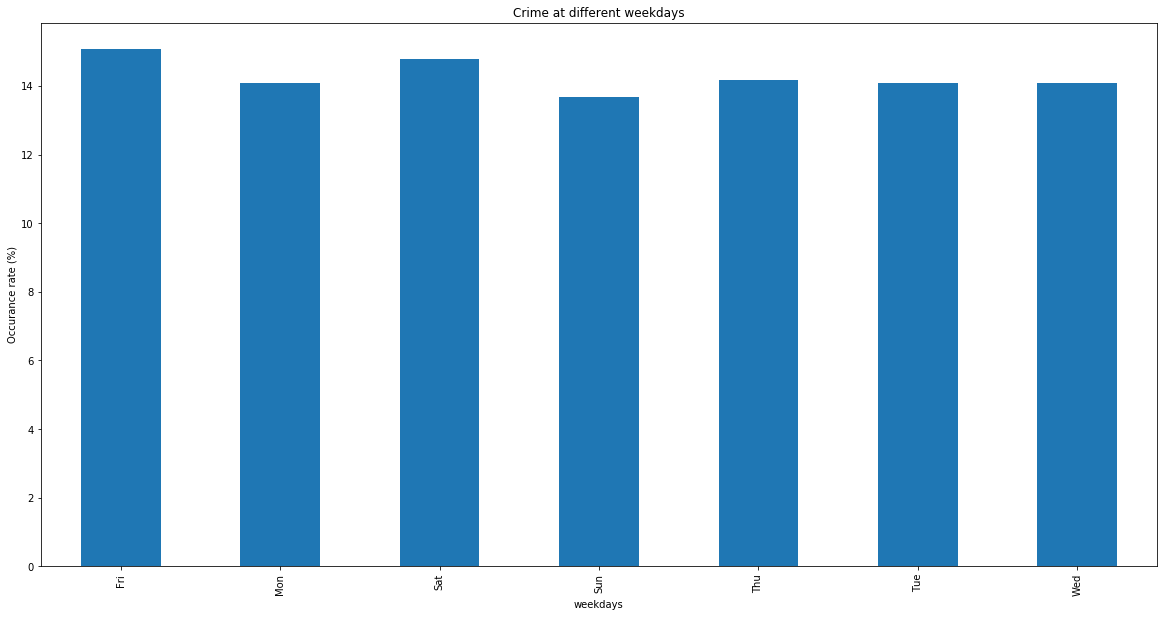

In [10]:
plt.rcParams["figure.figsize"] = (20,10)
df_time_weekdays.plot(kind = 'bar', title = 'Crime at different weekdays')
plt.xlabel('weekdays')
plt.ylabel('Occurance rate (%)')
plt.show()

### Crime classification at different months


Bar chart to represent the month based crime occurance rate. It can be seen that the month of December has the lowest crime rate.

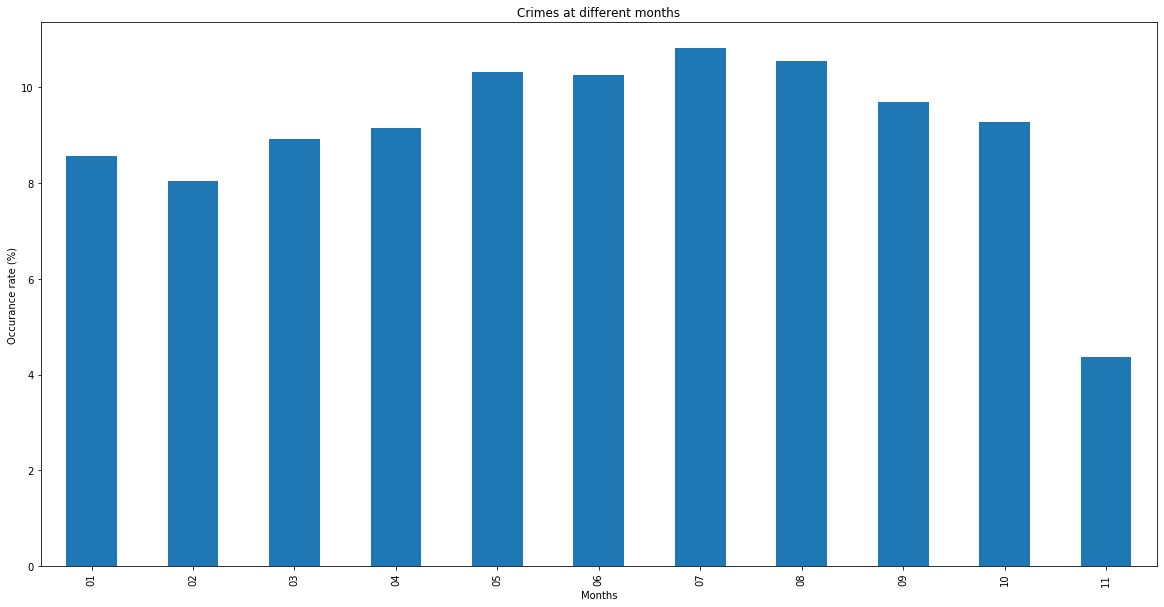

In [11]:
plt.rcParams['figure.figsize'] = (20,10)
df_time_month.plot(kind = 'bar')
plt.title('Crimes at different months')
plt.xlabel('Months')
plt.ylabel('Occurance rate (%)')
plt.show()

### Crime occurance rate at different hours

Hour based crime occurance rate. The maximum crime occurs at 1.00 PM and the lowest crime rate is an 5.00 AM.

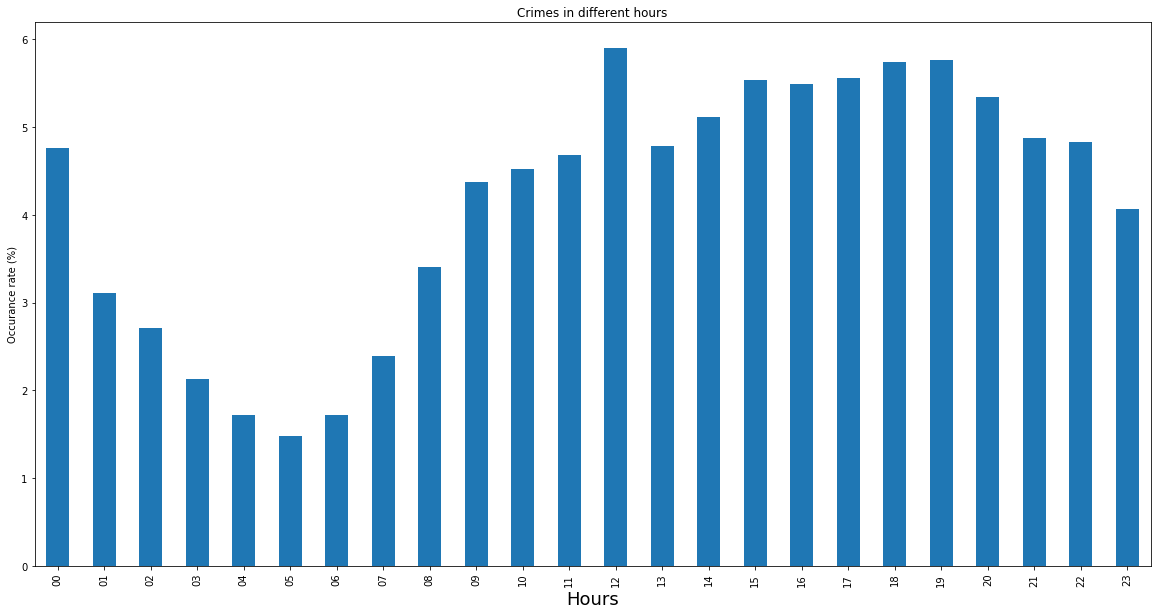

In [12]:
plt.rcParams["figure.figsize"]=(20,10)
df_time_hour.plot(kind = 'bar')
plt.title("Crimes in different hours")
plt.xlabel("Hours", fontsize = 18)
plt.ylabel("Occurance rate (%)")
plt.show()

### Minimize crime classes

Here, we want to analyze for a limited number of crimes. The crimes are: BURGLARY, ROBBERY, WEAPONS VIOLATION, CRIMINAL TRESPASS and MOTOR VEHICLE THEFT. We want to categorize all other crimes inside OTHERS section. We also want to add another new column as New Crime Type which contains only the new categiries.  

In [13]:
def top(item):
    crimetype = ["BURGLARY","ROBBERY","WEAPONS VIOLATION","CRIMINAL TRESPASS","MOTOR VEHICLE THEFT"]
    if item not in crimetype:
        return "OTHERS"
    else:
        return item
    
df["New Crime Type"] = df["Primary Type"].apply(top)

### Minimize Crime Location Classes


Similar to the previous section we want to minimize our crime locations. We want to categorize the crime locations into the sections- STREET, RESIDENCE, APARTMENT and SIDEWALK. Then, we will categorize all other crimes into OTHERS section. After that, we will create a new column in our dataframe named "New Crime Location".

In [14]:
def location(item):
    locations=['STREET','RESIDENCE','APARTMENT','SIDEWALK']
    if item not in locations:
        return "OTHERS"
    else:
        return item
    
df["New Crime Location"]=df["Location Description"].apply(location)

### Analyze new crime classes at diffetent locations 

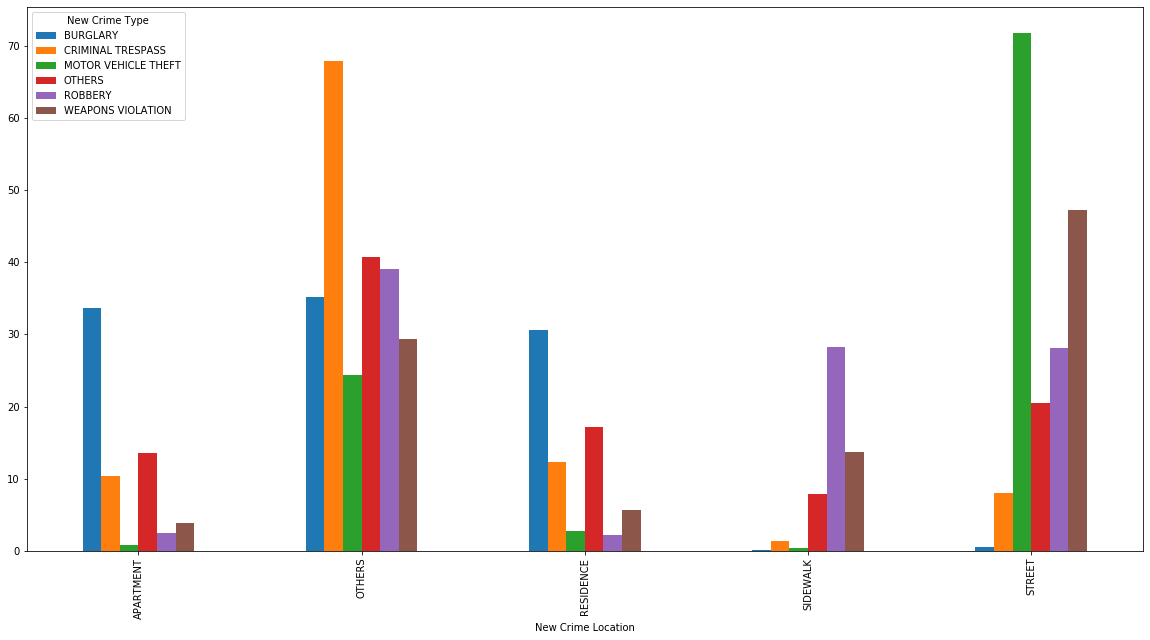

In [15]:
datasplit = df.groupby(["New Crime Location", "New Crime Type"])["New Crime Location"].count().unstack()
datasplit = datasplit.apply(lambda x:x/x.sum()*100)
datasplit.plot(kind = 'bar')

In [16]:
datasplit

New Crime Type,BURGLARY,CRIMINAL TRESPASS,MOTOR VEHICLE THEFT,OTHERS,ROBBERY,WEAPONS VIOLATION
New Crime Location,,,,,,
APARTMENT,33.695652,10.364146,0.825397,13.609791,2.497113,3.913824
OTHERS,35.164835,67.836546,24.304762,40.787763,39.044457,29.425494
RESIDENCE,30.578118,12.341407,2.742857,17.215212,2.179561,5.673250
SIDEWALK,0.047778,1.384083,0.368254,7.941082,28.233256,13.698384
STREET,0.513617,8.073818,71.758730,20.446153,28.045612,47.289048


### Importing New Datafile

In this section, a new CSV file "socioecono.csv" has been loaded for merging and the column name "Community Area Number" has been changed into "Community Area". In, the previous file, we also have a column name called "Community Area". Here, we will merge these two dataframes on the basis of "Community Area". The new dataframe will have a row size of 227078 and a column size of 35.

In [17]:
df2 = pd.read_csv('socioecono.csv')

In [18]:
df2.rename(columns={'Community Area Number':'Community Area'}, inplace = True)
merge_DF = pd.merge(df, df2, on = "Community Area")

In [19]:
print(merge_DF.shape)

(227078, 35)


In [20]:
merge_DF=merge_DF.dropna()
merge_DF.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'weekdays', 'month', 'hour', 'New Crime Type',
       'New Crime Location', 'COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX'],
      dtype='object')

#### In this part of this project we are categorizing the severe crimes and non-severe crimes. Later, we will apply ML algorithms to classify severe and non-severe crimes. We have also marked the severe crimes as 1 and non-severe crimes as 0. 

In [21]:
severe_crime_list=["ARSON", "ASSAULT", "BATTERY", "CRIM SEXUAL ASSAULT","CRIMINAL DAMAGE", 
                   "CRIMINAL TRESPASS", "HOMICIDE", "ROBBERY"]

In [22]:
merge_DF['Severe'] = np.where(merge_DF["Primary Type"].isin(severe_crime_list), 1, 0) 

In [23]:
merge_DF.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'weekdays', 'month', 'hour', 'New Crime Type',
       'New Crime Location', 'COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX', 'Severe'],
      dtype='object')

In [24]:
merge_DF = merge_DF.dropna()
merge_DF.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'weekdays', 'month', 'hour', 'New Crime Type',
       'New Crime Location', 'COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX', 'Severe'],
      dtype='object')

In [25]:
merge_DF["Primary Type"].shape

(225197,)

In [26]:
df1 = merge_DF
df1.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'weekdays', 'month', 'hour', 'New Crime Type',
       'New Crime Location', 'COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX', 'Severe'],
      dtype='object')

#### Dropping the unnecessary features

In [27]:
df1 = df1.drop(['ID',
                'Case Number',
                'Date',
                'Block',
                "Description",
                'IUCR',
                'Primary Type',
                'Beat','District',
                'Ward','FBI Code', 'X Coordinate','Y Coordinate',
                'New Crime Location',
                'Year', 'Updated On', 'Latitude', 'Longitude','Location',
                'New Crime Type','COMMUNITY AREA NAME'], axis = 1)

#CLUSTER_FEAT=['PERCENT OF HOUSING CROWDED','PERCENT HOUSEHOLDS BELOW POVERTY','PERCENT AGED 16+ UNEMPLOYED',
#              'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA','PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
#              'HARDSHIP INDEX']

#df_new = df1.drop(CLUSTER_FEAT, axis = 1)

#### Converting categorical values into numerical values using get_dummies() command of pandas dataframe.

In [28]:
dummydf=pd.get_dummies(df1,columns=["Community Area","hour","weekdays","month","Location Description","Arrest","Domestic"])


In [29]:
dummydf=dummydf.dropna()

In [30]:
dummydf.columns

Index(['PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX', 'Severe', 'Community Area_1.0', 'Community Area_2.0',
       ...
       'Location Description_VEHICLE NON-COMMERCIAL',
       'Location Description_VEHICLE-COMMERCIAL',
       'Location Description_VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS',
       'Location Description_VEHICLE-COMMERCIAL - TROLLEY BUS',
       'Location Description_WAREHOUSE', 'Location Description_YARD',
       'Arrest_False', 'Arrest_True', 'Domestic_False', 'Domestic_True'],
      dtype='object', length=255)

In [31]:
df.loc[:,'Community Area'].shape
df2.loc[:,'Community Area'].max()
#merge_DF.loc[:,'Community Area'].max()

77.0

In [32]:
dummydf.columns

Index(['PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX', 'Severe', 'Community Area_1.0', 'Community Area_2.0',
       ...
       'Location Description_VEHICLE NON-COMMERCIAL',
       'Location Description_VEHICLE-COMMERCIAL',
       'Location Description_VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS',
       'Location Description_VEHICLE-COMMERCIAL - TROLLEY BUS',
       'Location Description_WAREHOUSE', 'Location Description_YARD',
       'Arrest_False', 'Arrest_True', 'Domestic_False', 'Domestic_True'],
      dtype='object', length=255)

# kNN Algorithm 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [33]:
n = [2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000,25000,30000,40000,50000]
z1 = []
z2 = []
X = np.array(dummydf.drop(['Severe'], 1))
y = np.array(dummydf['Severe']).reshape(-1,1)
for i,item in enumerate(n):
    X = X[0:item,:]
    y = y[0:item,:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    knn = KNeighborsClassifier(n_neighbors=8)
    knn.fit(X_train, y_train)
    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)
    z1.append(train_acc)
    z2.append(test_acc)
    print("-------------------------------------------------------")

C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


-------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


-------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


-------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


-------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


-------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


-------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


-------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


-------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


-------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


-------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


-------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


-------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


-------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


-------------------------------------------------------


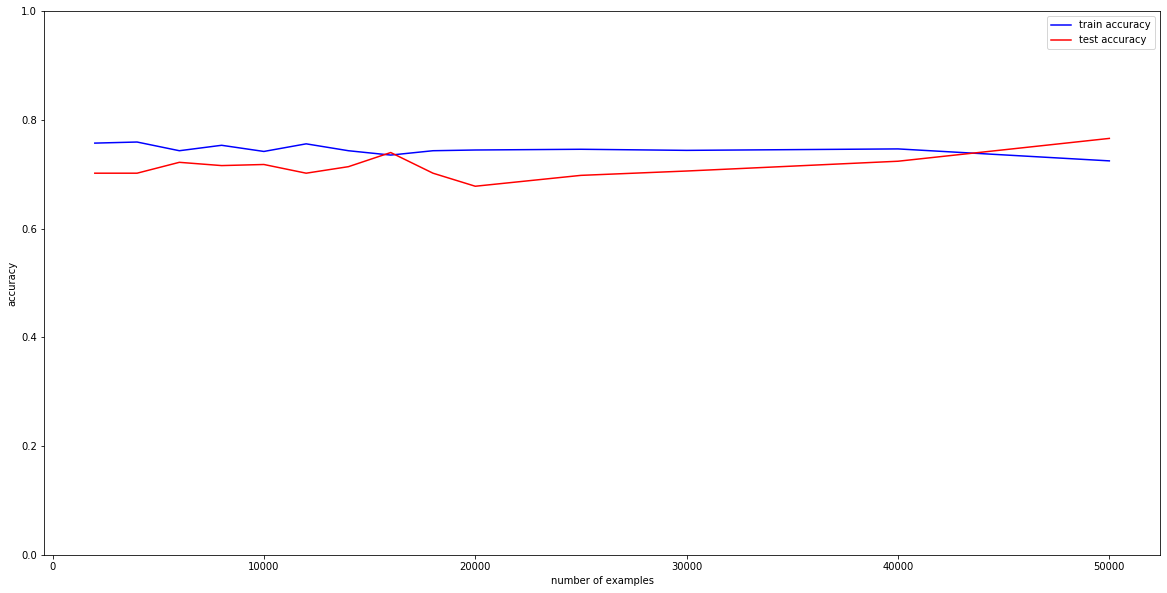

In [35]:
plt.plot(n,z1,'-b',label="train accuracy")
plt.plot(n,z2,'-r',label="test accuracy")
plt.ylim(0,1)
plt.rcParams["figure.figsize"] = (10,5)
plt.xlabel("number of examples")
plt.ylabel("accuracy")
plt.legend()
#plt.legend("train accuracy", "test accuracy")
plt.show()

## Severe and Non-severe crime classification

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
n = [2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000,25000,30000,40000,50000]
z1 = []
z2 = []
X = np.array(dummydf.drop(['Severe'], 1))
y = np.array(dummydf['Severe']).reshape(-1,1)

In [38]:
for i,item in enumerate(n):
    X = X[0:item,:]
    y = y[0:item,:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    train_acc = logreg.score(X_train, y_train)
    test_acc = logreg.score(X_test, y_test)
    z1.append(train_acc)
    z2.append(test_acc)
    print("-------------------------------------------------------")
    

C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------
-------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

In [39]:
print(n)
print(z1)
print(z2)

[2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000, 20000, 25000, 30000, 40000, 50000]
[0.706, 0.7153333333333334, 0.6906666666666667, 0.6986666666666667, 0.704, 0.7026666666666667, 0.696, 0.6986666666666667, 0.6926666666666667, 0.6993333333333334, 0.7046666666666667, 0.6946666666666667, 0.708, 0.694]
[0.684, 0.656, 0.73, 0.706, 0.69, 0.694, 0.714, 0.706, 0.724, 0.704, 0.688, 0.718, 0.678, 0.72]


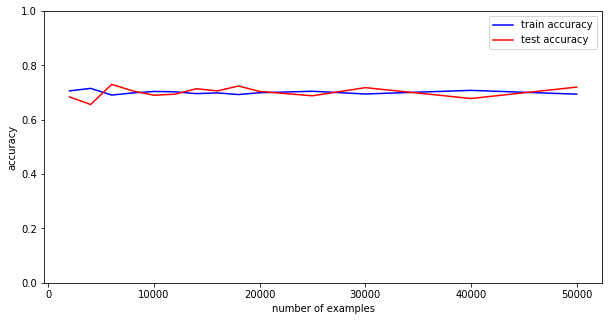

In [40]:
plt.plot(n,z1,'-b',label="train accuracy")
plt.plot(n,z2,'-r',label="test accuracy")
plt.rcParams["figure.figsize"] = (10,5)
plt.legend()
plt.ylim(0,1)
plt.xlabel("number of examples")
plt.ylabel("accuracy")
plt.show()

# 2nd Part : Crime Classification

##### This part of this project is very crucial because we not doing any simple classification, here we are implementing rare class classification. rare class classification is always a problematic task for the machine learning engineers.

##### The dataset where we will implement our ML algorithm is mainly imbalanced dataset. That's why first we have implemented the concept of upsampling bu applying SMOTE algorithm.

##### Among the supervised learning, we have implemented KNN, logistic regression and linear support vector machine. We also implemented  KMeans algorithm as unsupervised algorithm.

In [41]:
df_part2 = merge_DF
df_part2.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'weekdays', 'month', 'hour', 'New Crime Type',
       'New Crime Location', 'COMMUNITY AREA NAME',
       'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY',
       'PERCENT AGED 16+ UNEMPLOYED',
       'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
       'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ',
       'HARDSHIP INDEX', 'Severe'],
      dtype='object')

In [42]:
df_part2 = df_part2.drop(['ID',
                     'Case Number',
                     'Date','Block',
                     'IUCR',
                     'Primary Type','Beat','District',
                     'Ward','FBI Code', 'X Coordinate','Y Coordinate',
                     'New Crime Location','Year', 'Updated On', 
                     'Latitude', 'Longitude','Location','COMMUNITY AREA NAME','Severe',
                     'PERCENT OF HOUSING CROWDED','PERCENT HOUSEHOLDS BELOW POVERTY',
                     'PERCENT AGED 16+ UNEMPLOYED','PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA',
                     'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ','HARDSHIP INDEX',"Description"], axis = 1)

In [43]:
df_part2.columns

Index(['Location Description', 'Arrest', 'Domestic', 'Community Area',
       'weekdays', 'month', 'hour', 'New Crime Type'],
      dtype='object')

In [44]:
dummydf_part2 = pd.get_dummies(df_part2, columns=["Community Area",
                                                  "hour","weekdays","month",
                                                  "Location Description",
                                                  "New Crime Type",'Arrest','Domestic'])

In [45]:
dummydf_part2 = dummydf_part2.dropna()
#sum(dummydf_part2.loc[:,'New Crime Type_CRIMINAL DAMAGE']==1)
dummydf_part2 = dummydf_part2.drop(['New Crime Type_OTHERS'], axis =1)
dummydf_part2.columns
#dummydf_part2.shape


Index(['Community Area_1.0', 'Community Area_2.0', 'Community Area_3.0',
       'Community Area_4.0', 'Community Area_5.0', 'Community Area_6.0',
       'Community Area_7.0', 'Community Area_8.0', 'Community Area_9.0',
       'Community Area_10.0',
       ...
       'Location Description_YARD', 'New Crime Type_BURGLARY',
       'New Crime Type_CRIMINAL TRESPASS',
       'New Crime Type_MOTOR VEHICLE THEFT', 'New Crime Type_ROBBERY',
       'New Crime Type_WEAPONS VIOLATION', 'Arrest_False', 'Arrest_True',
       'Domestic_False', 'Domestic_True'],
      dtype='object', length=252)

# Logistic Regression for Part 2

In [46]:
Test_crime_2 = ['New Crime Type_BURGLARY','New Crime Type_CRIMINAL TRESPASS',
             'New Crime Type_MOTOR VEHICLE THEFT',
             'New Crime Type_ROBBERY','New Crime Type_WEAPONS VIOLATION']

In [119]:
for crime in Test_crime_2:
    Test_crime_2 = ['New Crime Type_BURGLARY','New Crime Type_CRIMINAL TRESPASS',
             'New Crime Type_MOTOR VEHICLE THEFT',
             'New Crime Type_ROBBERY','New Crime Type_WEAPONS VIOLATION']
    print("---------------------------------------------------------------------------------")
    print("                                   {}                              ".format(crime))
    print("---------------------------------------------------------------------------------")    
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix, classification_report    
    from imblearn.over_sampling import SMOTE
    from sklearn.svm import LinearSVC
    sm = SMOTE(kind='borderline1')    
    Test_crime_2.remove(crime)
    dummydf_part2 = dummydf_part2.dropna()
    dummydf_part2_new = dummydf_part2.drop(Test_crime_2, axis = 1)    
    X = dummydf_part2_new.drop(crime, axis = 1)
    #X1 = np.array(dummydf_part2_new.drop([crime],1))
    X = X.values
    Y = dummydf_part2_new[crime]
    #Y1 = np.array(dummydf_part2_new[crime])
    Y = Y.values.reshape(-1,1)
    #X = X[0:50000,:]
    #Y = Y[0:50000,:]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state = 0, stratify = Y)    
    X_resampled, y_resampled = sm.fit_sample(X_train, y_train)
    #X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled)
    #print(X_train_smote.shape)
    #print(X_test_smote.shape)
    #print(y_train_smote.shape)
    #print(y_test_smote.shape)
    
    print("number of 0 in y_test")
    print(sum(y_test==0))
    
    print("number of 1 in y_test")
    print(sum(y_test==1))
    print("X_train shape before upsampling")
    print(X_train.shape)
    print("Y_train shape before upsampling")
    print(y_train.shape)
    print("Size of X_train after upsampling")
    print(X_resampled.shape)
    print("Size of Y_train after upsampling")
    print(y_resampled.shape)    
    print("Model 1: Logistic Regression")
    LogReg2 = LogisticRegression(C=1000000, class_weight={1:3, 0:1},penalty = 'l2')
    #LogReg2 = LinearSVC(C=100000)
    LogReg2.fit(X_resampled, y_resampled)    
    train_acc = LogReg2.score(X_train, y_train)
    test_acc = LogReg2.score(X_test, y_test)
    print("Train accuracy and test accuracy with Logistic Regression for --------{}".format(crime))
    print("Train Accuracy")
    print(train_acc)
    print("Test Accuracy")
    print(test_acc)
    y_pred2 = LogReg2.predict(X_test)
    confmat2 = confusion_matrix(y_test, y_pred2)
    print("Confusion Matrix")
    print(confmat2)
    clfreport2 = classification_report(y_test, y_pred2)
    print("Classification Report")
    print(clfreport2)

---------------------------------------------------------------------------------
                                   New Crime Type_BURGLARY                              
---------------------------------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of 0 in y_test
[65051]
number of 1 in y_test
[2509]
X_train shape before upsampling
(157637, 248)
Y_train shape before upsampling
(157637, 1)
Size of X_train after upsampling
(303564, 248)
Size of Y_train after upsampling
(303564,)
Model 1: Logistic Regression


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train accuracy and test accuracy with Logistic Regression for --------New Crime Type_BURGLARY
Train Accuracy
0.9806898126708831
Test Accuracy
0.980683836589698
Confusion Matrix
[[63950  1101]
 [  204  2305]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     65051
           1       0.68      0.92      0.78      2509

    accuracy                           0.98     67560
   macro avg       0.84      0.95      0.88     67560
weighted avg       0.98      0.98      0.98     67560

---------------------------------------------------------------------------------
                                   New Crime Type_CRIMINAL TRESPASS                              
---------------------------------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of 0 in y_test
[65743]
number of 1 in y_test
[1817]
X_train shape before upsampling
(157637, 248)
Y_train shape before upsampling
(157637, 1)
Size of X_train after upsampling
(306796, 248)
Size of Y_train after upsampling
(306796,)
Model 1: Logistic Regression


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train accuracy and test accuracy with Logistic Regression for --------New Crime Type_CRIMINAL TRESPASS
Train Accuracy
0.9710156879412828
Test Accuracy
0.969582593250444
Confusion Matrix
[[64209  1534]
 [  521  1296]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     65743
           1       0.46      0.71      0.56      1817

    accuracy                           0.97     67560
   macro avg       0.72      0.84      0.77     67560
weighted avg       0.98      0.97      0.97     67560

---------------------------------------------------------------------------------
                                   New Crime Type_MOTOR VEHICLE THEFT                              
---------------------------------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of 0 in y_test
[65199]
number of 1 in y_test
[2361]
X_train shape before upsampling
(157637, 248)
Y_train shape before upsampling
(157637, 1)
Size of X_train after upsampling
(304258, 248)
Size of Y_train after upsampling
(304258,)
Model 1: Logistic Regression


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train accuracy and test accuracy with Logistic Regression for --------New Crime Type_MOTOR VEHICLE THEFT
Train Accuracy
0.9765664152451519
Test Accuracy
0.9756956779159266
Confusion Matrix
[[63917  1282]
 [  360  2001]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     65199
           1       0.61      0.85      0.71      2361

    accuracy                           0.98     67560
   macro avg       0.80      0.91      0.85     67560
weighted avg       0.98      0.98      0.98     67560

---------------------------------------------------------------------------------
                                   New Crime Type_ROBBERY                              
---------------------------------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of 0 in y_test
[65482]
number of 1 in y_test
[2078]
X_train shape before upsampling
(157637, 248)
Y_train shape before upsampling
(157637, 1)
Size of X_train after upsampling
(305578, 248)
Size of Y_train after upsampling
(305578,)
Model 1: Logistic Regression


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train accuracy and test accuracy with Logistic Regression for --------New Crime Type_ROBBERY
Train Accuracy
0.95775737929547
Test Accuracy
0.956364712847839
Confusion Matrix
[[62985  2497]
 [  451  1627]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     65482
           1       0.39      0.78      0.52      2078

    accuracy                           0.96     67560
   macro avg       0.69      0.87      0.75     67560
weighted avg       0.97      0.96      0.96     67560

---------------------------------------------------------------------------------
                                   New Crime Type_WEAPONS VIOLATION                              
---------------------------------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of 0 in y_test
[65889]
number of 1 in y_test
[1671]
X_train shape before upsampling
(157637, 248)
Y_train shape before upsampling
(157637, 1)
Size of X_train after upsampling
(307478, 248)
Size of Y_train after upsampling
(307478,)
Model 1: Logistic Regression


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train accuracy and test accuracy with Logistic Regression for --------New Crime Type_WEAPONS VIOLATION
Train Accuracy
0.976319011399608
Test Accuracy
0.975902901124926
Confusion Matrix
[[64680  1209]
 [  419  1252]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     65889
           1       0.51      0.75      0.61      1671

    accuracy                           0.98     67560
   macro avg       0.75      0.87      0.80     67560
weighted avg       0.98      0.98      0.98     67560



# Grid Logistic Regression for Part 2

In [ ]:
Test_crime_2 = ['New Crime Type_BURGLARY','New Crime Type_CRIMINAL TRESPASS',
             'New Crime Type_MOTOR VEHICLE THEFT',
             'New Crime Type_ROBBERY','New Crime Type_WEAPONS VIOLATION']

In [ ]:
for crime in Test_crime_2:
    Test_crime_2 = ['New Crime Type_BURGLARY','New Crime Type_CRIMINAL TRESPASS',
             'New Crime Type_MOTOR VEHICLE THEFT',
             'New Crime Type_ROBBERY','New Crime Type_WEAPONS VIOLATION']
    print("---------------------------------------------------------------------------------")
    print("                                   {}                              ".format(crime))
    print("---------------------------------------------------------------------------------")    
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix, classification_report, recall_score    
    from imblearn.over_sampling import SMOTE
    from sklearn.svm import LinearSVC
    from sklearn.model_selection import GridSearchCV
    
    
    sm = SMOTE(kind='borderline1')    
    Test_crime_2.remove(crime)
    dummydf_part2 = dummydf_part2.dropna()
    dummydf_part2_new = dummydf_part2.drop(Test_crime_2, axis = 1)    
    X = dummydf_part2_new.drop(crime, axis = 1)
    #X1 = np.array(dummydf_part2_new.drop([crime],1))
    X = X.values
    Y = dummydf_part2_new[crime]
    #Y1 = np.array(dummydf_part2_new[crime])
    Y = Y.values.reshape(-1,1)
    X = X[0:500,:]
    Y = Y[0:500,:]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state = 0, stratify = Y)    
    X_resampled, y_resampled = sm.fit_sample(X_train, y_train)
    #X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled)
    #print(X_train_smote.shape)
    #print(X_test_smote.shape)
    #print(y_train_smote.shape)
    #print(y_test_smote.shape)
    
    LogReg2 = LogisticRegression()
    c_space = np.logspace(-5, 8, 15)
    class_weights = {[{1: w} for w in [1, 2, 4, 6, 10]], [{0: w} for w in [1, 2, 4, 6, 10]]}
    #{{0: w} for w in [.1,.2,.3,.5,1,1.5,2,2.5,3,3.5,4,4.5,5], 
                     #{1:w} for w in[.1,.2,.3,.5,1,1.5,2,2.5,3,3.5,4,4.5,5]}
    
    penaltys = ['l1','l2']
    param_grid = {'C':c_space, 'class_weight':class_weights, 'penalty':penaltys}
    
    grid = GridSearchCV(estimator=LogReg2, param_grid=param_grid, scoring='recall', cv = 5)
    
    
    print("number of 0 in y_test")
    print(sum(y_test==0))
    
    print("number of 1 in y_test")
    print(sum(y_test==1))
    print("X_train shape before upsampling")
    print(X_train.shape)
    print("Y_train shape before upsampling")
    print(y_train.shape)
    print("Size of X_train after upsampling")
    print(X_resampled.shape)
    print("Size of Y_train after upsampling")
    print(y_resampled.shape)    
    print("Model 1: Logistic Regression")
    #C = [1,10,100,1000,10000,100000]
    
    #LogReg2 = LinearSVC(C=100000)
    grid.fit(X_resampled, y_resampled)    
    train_acc = grid.score(X_train, y_train)
    test_acc = grid.score(X_test, y_test)
    print("Train accuracy and test accuracy with Logistic Regression for --------{}".format(crime))
    print("Train Accuracy")
    print(train_acc)
    print("Test Accuracy")
    print(test_acc)
    y_pred2 = grid.predict(X_test)
    confmat2 = confusion_matrix(y_test, y_pred2)
    print("Confusion Matrix")
    print(confmat2)
    clfreport2 = classification_report(y_test, y_pred2)
    print("Classification Report")
    print(clfreport2)
    print(grid.best_params_)
    print(grid.best_score)

In [49]:
Test_crime = ['New Crime Type_BURGLARY','New Crime Type_CRIMINAL TRESPASS',
             'New Crime Type_MOTOR VEHICLE THEFT',
             'New Crime Type_ROBBERY','New Crime Type_WEAPONS VIOLATION']

# KNN for Part 2

In [50]:
for crime in Test_crime:
    Test_crime = ['New Crime Type_BURGLARY','New Crime Type_CRIMINAL TRESPASS',
             'New Crime Type_MOTOR VEHICLE THEFT',
             'New Crime Type_ROBBERY','New Crime Type_WEAPONS VIOLATION']
    print("---------------------------------------------------------------------------------")
    print("                                   {}                              ".format(crime))
    print("---------------------------------------------------------------------------------")
    Test_crime.remove(crime)
    dummydf_part2 = dummydf_part2.dropna()
    dummydf_part2_new = dummydf_part2.drop(Test_crime, axis = 1)
    X1 = dummydf_part2_new.drop(crime, axis = 1)
    X1 = X1.values
    Y1 = dummydf_part2_new[crime]
    Y1 = Y1.values.reshape(-1,1)
    #print(X1.shape)
    #print(Y1.shape)
    X1 = X1[0:25000,:]
    Y1 = Y1[0:25000,:]
    
    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import confusion_matrix, classification_report
    from imblearn.over_sampling import SMOTE
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size = 0.3, random_state = 0, stratify = Y1)
    
    print("number of 0 in ytest1")
    print(sum(y_test1==0))
    
    print("number of 1 in ytest1")
    print(sum(y_test1==1))
    
    print(X_train1.shape)
    print(y_train1.shape)
    
    
    
    sm1 = SMOTE(random_state = 0) 
    print("Model: K-Nearest Neighbor (KNN)")
    X1_resampled, y1_resampled = sm1.fit_sample(X_train1, y_train1)
    
    print(X1_resampled.shape)
    print(y1_resampled.shape)
    
    
    knn2 = KNeighborsClassifier(n_neighbors=3)
    knn2.fit(X1_resampled, y1_resampled)
    train_acc = knn2.score(X_train1, y_train1)
    test_acc = knn2.score(X_test1, y_test1)
    print("Train accuracy and test accuracy with KNN for --------{}".format(crime))
    print("Train Accuracy")
    print(train_acc)
    print("Test Accuracy")
    print(test_acc)
    y_pred = knn2.predict(X_test1)
    confmat = confusion_matrix(y_test1,y_pred)
    print("Confusion Matrix")
    print(confmat)
    clfreport = classification_report(y_test1,y_pred)
    print("Classification Report")
    print(clfreport)   

---------------------------------------------------------------------------------
                                   New Crime Type_BURGLARY                              
---------------------------------------------------------------------------------
number of 0 in ytest1
[7329]
number of 1 in ytest1
[171]
(17500, 247)
(17500, 1)
Model: K-Nearest Neighbor (KNN)
(34204, 247)
(34204,)


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train accuracy and test accuracy with KNN for --------New Crime Type_BURGLARY
Train Accuracy
0.9806857142857143
Test Accuracy
0.9694666666666667
Confusion Matrix
[[7259   70]
 [ 159   12]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7329
           1       0.15      0.07      0.09       171

    accuracy                           0.97      7500
   macro avg       0.56      0.53      0.54      7500
weighted avg       0.96      0.97      0.96      7500

---------------------------------------------------------------------------------
                                   New Crime Type_CRIMINAL TRESPASS                              
---------------------------------------------------------------------------------
number of 0 in ytest1
[7292]
number of 1 in ytest1
[208]
(17500, 247)
(17500, 1)
Model: K-Nearest Neighbor (KNN)


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(34026, 247)
(34026,)
Train accuracy and test accuracy with KNN for --------New Crime Type_CRIMINAL TRESPASS
Train Accuracy
0.9766285714285714
Test Accuracy
0.9646666666666667
Confusion Matrix
[[7210   82]
 [ 183   25]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7292
           1       0.23      0.12      0.16       208

    accuracy                           0.96      7500
   macro avg       0.60      0.55      0.57      7500
weighted avg       0.95      0.96      0.96      7500

---------------------------------------------------------------------------------
                                   New Crime Type_MOTOR VEHICLE THEFT                              
---------------------------------------------------------------------------------
number of 0 in ytest1
[7244]
number of 1 in ytest1
[256]
(17500, 247)
(17500, 1)
Model: K-Nearest Neighbor (KNN)


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(33808, 247)
(33808,)
Train accuracy and test accuracy with KNN for --------New Crime Type_MOTOR VEHICLE THEFT
Train Accuracy
0.9705142857142857
Test Accuracy
0.9550666666666666
Confusion Matrix
[[7133  111]
 [ 226   30]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      7244
           1       0.21      0.12      0.15       256

    accuracy                           0.96      7500
   macro avg       0.59      0.55      0.56      7500
weighted avg       0.94      0.96      0.95      7500

---------------------------------------------------------------------------------
                                   New Crime Type_ROBBERY                              
---------------------------------------------------------------------------------
number of 0 in ytest1
[7232]
number of 1 in ytest1
[268]
(17500, 247)
(17500, 1)
Model: K-Nearest Neighbor (KNN)


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(33752, 247)
(33752,)
Train accuracy and test accuracy with KNN for --------New Crime Type_ROBBERY
Train Accuracy
0.9694857142857143
Test Accuracy
0.9548
Confusion Matrix
[[7139   93]
 [ 246   22]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7232
           1       0.19      0.08      0.11       268

    accuracy                           0.95      7500
   macro avg       0.58      0.53      0.55      7500
weighted avg       0.94      0.95      0.95      7500

---------------------------------------------------------------------------------
                                   New Crime Type_WEAPONS VIOLATION                              
---------------------------------------------------------------------------------
number of 0 in ytest1
[7357]
number of 1 in ytest1
[143]
(17500, 247)
(17500, 1)
Model: K-Nearest Neighbor (KNN)
(34332, 247)
(34332,)


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train accuracy and test accuracy with KNN for --------New Crime Type_WEAPONS VIOLATION
Train Accuracy
0.9814285714285714
Test Accuracy
0.9733333333333334
Confusion Matrix
[[7284   73]
 [ 127   16]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7357
           1       0.18      0.11      0.14       143

    accuracy                           0.97      7500
   macro avg       0.58      0.55      0.56      7500
weighted avg       0.97      0.97      0.97      7500



# Model 3: Linear SVM for part 2

In [91]:
Test_crime_3 = ['New Crime Type_BURGLARY','New Crime Type_CRIMINAL TRESPASS',
             'New Crime Type_MOTOR VEHICLE THEFT',
             'New Crime Type_ROBBERY','New Crime Type_WEAPONS VIOLATION']

In [92]:
for crime in Test_crime_3:
    Test_crime_3 = ['New Crime Type_BURGLARY','New Crime Type_CRIMINAL TRESPASS',
             'New Crime Type_MOTOR VEHICLE THEFT',
             'New Crime Type_ROBBERY','New Crime Type_WEAPONS VIOLATION']
    print("---------------------------------------------------------------------------------")
    print("                                   {}                              ".format(crime))
    print("---------------------------------------------------------------------------------")
    from sklearn.svm import LinearSVC
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix, classification_report
    from imblearn.over_sampling import SMOTE
    sm = SMOTE(random_state=0)
    Test_crime_3.remove(crime)
    #dummydf_part2 = dummydf_part2.dropna()
    dummydf_part2_new = dummydf_part2.drop(Test_crime_3, axis = 1)
    X1 = dummydf_part2_new.drop(crime, axis = 1)
    X1 = X1.values
    Y1 = dummydf_part2_new[crime]
    Y1 = Y1.values.reshape(-1,1)
    #print(X1.shape)
    #print(Y1.shape)
    #X1 = X1[0:50000,:]
    #Y1 = Y1[0:50000,:]
    X_train, X_test, y_train, y_test = train_test_split(X1, Y1, train_size = 0.7, random_state = 0, stratify = Y1)    
    X_resampled, y_resampled = sm.fit_sample(X_train, y_train)
    
    print("number of 0 in y_test")
    print(sum(y_test==0))
    
    print("number of 1 in y_test")
    print(sum(y_test==1))
    print("X_train shape before upsampling")
    print(X_train.shape)
    print("Y_train shape before upsampling")
    print(y_train.shape)
    print("Size of X_train after upsampling")
    print(X_resampled.shape)
    print("Size of Y_train after upsampling")
    print(y_resampled.shape)
    
    
    print("Model : Linear SVM")
    lsvc = LinearSVC(penalty = 'l2', C = 1, class_weight={0:0.6, 1:3}, loss = 'squared_hinge')
    lsvc.fit(X_resampled, y_resampled)
    train_acc = lsvc.score(X_train, y_train)
    test_acc = lsvc.score(X_test, y_test)
    print("Train accuracy and test accuracy with Linear SVM for --------{}".format(crime))
    print("Train Accuracy")
    print(train_acc)
    print("Test Accuracy")
    print(test_acc)
    y_pred3 = lsvc.predict(X_test)
    confmat3 = confusion_matrix(y_test,y_pred3)
    print("Confusion Matrix")
    print(confmat3)
    clfreport3 = classification_report(y_test,y_pred3)
    print("Classification Report")
    print(clfreport3)

---------------------------------------------------------------------------------
                                   New Crime Type_BURGLARY                              
---------------------------------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of 0 in y_test
[65051]
number of 1 in y_test
[2509]
X_train shape before upsampling
(157637, 247)
Y_train shape before upsampling
(157637, 1)
Size of X_train after upsampling
(303564, 247)
Size of Y_train after upsampling
(303564,)
Model : Linear SVM


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train accuracy and test accuracy with Linear SVM for --------New Crime Type_BURGLARY
Train Accuracy
0.9062973794223438
Test Accuracy
0.9032859680284192
Confusion Matrix
[[59605  5446]
 [ 1088  1421]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     65051
           1       0.21      0.57      0.30      2509

    accuracy                           0.90     67560
   macro avg       0.59      0.74      0.63     67560
weighted avg       0.95      0.90      0.92     67560

---------------------------------------------------------------------------------
                                   New Crime Type_CRIMINAL TRESPASS                              
---------------------------------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of 0 in y_test
[65743]
number of 1 in y_test
[1817]
X_train shape before upsampling
(157637, 247)
Y_train shape before upsampling
(157637, 1)
Size of X_train after upsampling
(306796, 247)
Size of Y_train after upsampling
(306796,)
Model : Linear SVM


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train accuracy and test accuracy with Linear SVM for --------New Crime Type_CRIMINAL TRESPASS
Train Accuracy
0.9667654167486059
Test Accuracy
0.9659117821195974
Confusion Matrix
[[64942   801]
 [ 1502   315]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     65743
           1       0.28      0.17      0.21      1817

    accuracy                           0.97     67560
   macro avg       0.63      0.58      0.60     67560
weighted avg       0.96      0.97      0.96     67560

---------------------------------------------------------------------------------
                                   New Crime Type_MOTOR VEHICLE THEFT                              
---------------------------------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of 0 in y_test
[65199]
number of 1 in y_test
[2361]
X_train shape before upsampling
(157637, 247)
Y_train shape before upsampling
(157637, 1)
Size of X_train after upsampling
(304258, 247)
Size of Y_train after upsampling
(304258,)
Model : Linear SVM


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train accuracy and test accuracy with Linear SVM for --------New Crime Type_MOTOR VEHICLE THEFT
Train Accuracy
0.8670616669944239
Test Accuracy
0.8669478981645944
Confusion Matrix
[[56959  8240]
 [  749  1612]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.87      0.93     65199
           1       0.16      0.68      0.26      2361

    accuracy                           0.87     67560
   macro avg       0.58      0.78      0.60     67560
weighted avg       0.96      0.87      0.90     67560

---------------------------------------------------------------------------------
                                   New Crime Type_ROBBERY                              
---------------------------------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of 0 in y_test
[65482]
number of 1 in y_test
[2078]
X_train shape before upsampling
(157637, 247)
Y_train shape before upsampling
(157637, 1)
Size of X_train after upsampling
(305578, 247)
Size of Y_train after upsampling
(305578,)
Model : Linear SVM


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train accuracy and test accuracy with Linear SVM for --------New Crime Type_ROBBERY
Train Accuracy
0.9495613339507857
Test Accuracy
0.9499259917110716
Confusion Matrix
[[63607  1875]
 [ 1508   570]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     65482
           1       0.23      0.27      0.25      2078

    accuracy                           0.95     67560
   macro avg       0.60      0.62      0.61     67560
weighted avg       0.95      0.95      0.95     67560

---------------------------------------------------------------------------------
                                   New Crime Type_WEAPONS VIOLATION                              
---------------------------------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of 0 in y_test
[65889]
number of 1 in y_test
[1671]
X_train shape before upsampling
(157637, 247)
Y_train shape before upsampling
(157637, 1)
Size of X_train after upsampling
(307478, 247)
Size of Y_train after upsampling
(307478,)
Model : Linear SVM


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train accuracy and test accuracy with Linear SVM for --------New Crime Type_WEAPONS VIOLATION
Train Accuracy
0.9366899902941568
Test Accuracy
0.9336589698046182
Confusion Matrix
[[62334  3555]
 [  927   744]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     65889
           1       0.17      0.45      0.25      1671

    accuracy                           0.93     67560
   macro avg       0.58      0.70      0.61     67560
weighted avg       0.97      0.93      0.95     67560



# Model 4: KMeans Clustering

In [51]:
Test_crime_2 = ['New Crime Type_BURGLARY','New Crime Type_CRIMINAL TRESPASS',
             'New Crime Type_MOTOR VEHICLE THEFT',
             'New Crime Type_ROBBERY','New Crime Type_WEAPONS VIOLATION']

In [52]:
for crime in Test_crime_2:
    Test_crime_2 = ['New Crime Type_BURGLARY','New Crime Type_CRIMINAL TRESPASS',
             'New Crime Type_MOTOR VEHICLE THEFT',
             'New Crime Type_ROBBERY','New Crime Type_WEAPONS VIOLATION']
    print("---------------------------------------------------------------------------------")
    print("                                   {}                              ".format(crime))
    print("---------------------------------------------------------------------------------")    
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix, classification_report
    
    
    
    from imblearn.over_sampling import SMOTE
    #from sklearn.svm import LinearSVC
    from sklearn.cluster import KMeans
    sm = SMOTE(random_state = 0)    
    Test_crime_2.remove(crime)
    dummydf_part2 = dummydf_part2.dropna()
    dummydf_part2_new = dummydf_part2.drop(Test_crime_2, axis = 1)    
    X = dummydf_part2_new.drop(crime, axis = 1)
    #X1 = np.array(dummydf_part2_new.drop([crime],1))
    X = X.values
    Y = dummydf_part2_new[crime]
    #Y1 = np.array(dummydf_part2_new[crime])
    Y = Y.values.reshape(-1,1)
    #X = X[0:50000,:]
    #Y = Y[0:50000,:]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state = 0)    
    #X_resampled, y_resampled = sm.fit_sample(X_train, y_train)
    print("Model 2: Logistic Regression")
    LogReg2 = KMeans(n_clusters = 2)
    LogReg2.fit(X_train)
    
    #train_acc = LogReg2.score(X_train, y_train)
    #test_acc = LogReg2.score(X_test, y_test)
    #print("Train accuracy and test accuracy with Logistic Regression for --------{}".format(crime))
    #print("Train Accuracy")
    #print(train_acc)
    #print("Test Accuracy")
    #print(test_acc)
    y_pred2 = LogReg2.predict(X_test)
    confmat2 = confusion_matrix(y_test, y_pred2)
    print("Confusion Matrix")
    print(confmat2)
    clfreport2 = classification_report(y_test, y_pred2)
    print("Classification Report")
    print(clfreport2)

---------------------------------------------------------------------------------
                                   New Crime Type_BURGLARY                              
---------------------------------------------------------------------------------
Model 2: Logistic Regression
Confusion Matrix
[[14349 50719]
 [  119  2373]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.22      0.36     65068
           1       0.04      0.95      0.09      2492

    accuracy                           0.25     67560
   macro avg       0.52      0.59      0.22     67560
weighted avg       0.96      0.25      0.35     67560

---------------------------------------------------------------------------------
                                   New Crime Type_CRIMINAL TRESPASS                              
---------------------------------------------------------------------------------
Model 2: Logistic Regression
Confusion Matrix
[[54430 11294

# LinearSVC with different parameters

In [158]:
Test_crime_3 = ['New Crime Type_BURGLARY','New Crime Type_CRIMINAL TRESPASS',
             'New Crime Type_MOTOR VEHICLE THEFT',
             'New Crime Type_ROBBERY','New Crime Type_WEAPONS VIOLATION']

In [159]:
for crime in Test_crime_3:
    Test_crime_3 = ['New Crime Type_BURGLARY','New Crime Type_CRIMINAL TRESPASS',
             'New Crime Type_MOTOR VEHICLE THEFT',
             'New Crime Type_ROBBERY','New Crime Type_WEAPONS VIOLATION']
    print("---------------------------------------------------------------------------------")
    print("                                   {}                              ".format(crime))
    print("---------------------------------------------------------------------------------")
    from sklearn.svm import LinearSVC
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix, classification_report
    from imblearn.over_sampling import SMOTE
    sm = SMOTE(kind = 'borderline1',random_state=0)
    Test_crime_3.remove(crime)
    #dummydf_part2 = dummydf_part2.dropna()
    dummydf_part2_new = dummydf_part2.drop(Test_crime_3, axis = 1)
    X1 = dummydf_part2_new.drop(crime, axis = 1)
    X1 = X1.values
    Y1 = dummydf_part2_new[crime]
    Y1 = Y1.values.reshape(-1,1)
    #print(X1.shape)
    #print(Y1.shape)
    #X1 = X1[0:50000,:]
    #Y1 = Y1[0:50000,:]
    X_train, X_test, y_train, y_test = train_test_split(X1, Y1, train_size = 0.7, random_state = 0, stratify = Y1)    
    X_resampled, y_resampled = sm.fit_sample(X_train, y_train)
    
    print("number of 0 in y_test")
    print(sum(y_test==0))
    
    print("number of 1 in y_test")
    print(sum(y_test==1))
    print("X_train shape before upsampling")
    print(X_train.shape)
    print("Y_train shape before upsampling")
    print(y_train.shape)
    print("Size of X_train after upsampling")
    print(X_resampled.shape)
    print("Size of Y_train after upsampling")
    print(y_resampled.shape)
    
    
    print("Model : Linear SVM")
    lsvc = LinearSVC(penalty = 'l2', C = 1, class_weight={0:0.6, 1:3}, loss = 'squared_hinge')
    lsvc.fit(X_resampled, y_resampled)
    train_acc = lsvc.score(X_train, y_train)
    test_acc = lsvc.score(X_test, y_test)
    print("Train accuracy and test accuracy with Linear SVM for --------{}".format(crime))
    print("Train Accuracy")
    print(train_acc)
    print("Test Accuracy")
    print(test_acc)
    y_pred3 = lsvc.predict(X_test)
    confmat3 = confusion_matrix(y_test,y_pred3)
    print("Confusion Matrix")
    print(confmat3)
    clfreport3 = classification_report(y_test,y_pred3)
    print("Classification Report")
    print(clfreport3)

---------------------------------------------------------------------------------
                                   New Crime Type_BURGLARY                              
---------------------------------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of 0 in y_test
[65051]
number of 1 in y_test
[2509]
X_train shape before upsampling
(157637, 247)
Y_train shape before upsampling
(157637, 1)
Size of X_train after upsampling
(303564, 247)
Size of Y_train after upsampling
(303564,)
Model : Linear SVM


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train accuracy and test accuracy with Linear SVM for --------New Crime Type_BURGLARY
Train Accuracy
0.9005690288447509
Test Accuracy
0.8971432800473653
Confusion Matrix
[[59124  5927]
 [ 1022  1487]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     65051
           1       0.20      0.59      0.30      2509

    accuracy                           0.90     67560
   macro avg       0.59      0.75      0.62     67560
weighted avg       0.95      0.90      0.92     67560

---------------------------------------------------------------------------------
                                   New Crime Type_CRIMINAL TRESPASS                              
---------------------------------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of 0 in y_test
[65743]
number of 1 in y_test
[1817]
X_train shape before upsampling
(157637, 247)
Y_train shape before upsampling
(157637, 1)
Size of X_train after upsampling
(306796, 247)
Size of Y_train after upsampling
(306796,)
Model : Linear SVM


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train accuracy and test accuracy with Linear SVM for --------New Crime Type_CRIMINAL TRESPASS
Train Accuracy
0.9592481460570805
Test Accuracy
0.9578152753108348
Confusion Matrix
[[64287  1456]
 [ 1394   423]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     65743
           1       0.23      0.23      0.23      1817

    accuracy                           0.96     67560
   macro avg       0.60      0.61      0.60     67560
weighted avg       0.96      0.96      0.96     67560

---------------------------------------------------------------------------------
                                   New Crime Type_MOTOR VEHICLE THEFT                              
---------------------------------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of 0 in y_test
[65199]
number of 1 in y_test
[2361]
X_train shape before upsampling
(157637, 247)
Y_train shape before upsampling
(157637, 1)
Size of X_train after upsampling
(304258, 247)
Size of Y_train after upsampling
(304258,)
Model : Linear SVM


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train accuracy and test accuracy with Linear SVM for --------New Crime Type_MOTOR VEHICLE THEFT
Train Accuracy
0.8593350545874382
Test Accuracy
0.8589105979869746
Confusion Matrix
[[56356  8843]
 [  689  1672]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     65199
           1       0.16      0.71      0.26      2361

    accuracy                           0.86     67560
   macro avg       0.57      0.79      0.59     67560
weighted avg       0.96      0.86      0.90     67560

---------------------------------------------------------------------------------
                                   New Crime Type_ROBBERY                              
---------------------------------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of 0 in y_test
[65482]
number of 1 in y_test
[2078]
X_train shape before upsampling
(157637, 247)
Y_train shape before upsampling
(157637, 1)
Size of X_train after upsampling
(305578, 247)
Size of Y_train after upsampling
(305578,)
Model : Linear SVM


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train accuracy and test accuracy with Linear SVM for --------New Crime Type_ROBBERY
Train Accuracy
0.9410290731236955
Test Accuracy
0.9421403197158081
Confusion Matrix
[[62959  2523]
 [ 1386   692]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     65482
           1       0.22      0.33      0.26      2078

    accuracy                           0.94     67560
   macro avg       0.60      0.65      0.62     67560
weighted avg       0.95      0.94      0.95     67560

---------------------------------------------------------------------------------
                                   New Crime Type_WEAPONS VIOLATION                              
---------------------------------------------------------------------------------


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


number of 0 in y_test
[65889]
number of 1 in y_test
[1671]
X_train shape before upsampling
(157637, 247)
Y_train shape before upsampling
(157637, 1)
Size of X_train after upsampling
(307478, 247)
Size of Y_train after upsampling
(307478,)
Model : Linear SVM


C:\Users\User\AppData\Local\conda\conda\envs\UserEnv\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train accuracy and test accuracy with Linear SVM for --------New Crime Type_WEAPONS VIOLATION
Train Accuracy
0.9307649853777984
Test Accuracy
0.9275014801657786
Confusion Matrix
[[61855  4034]
 [  864   807]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     65889
           1       0.17      0.48      0.25      1671

    accuracy                           0.93     67560
   macro avg       0.58      0.71      0.60     67560
weighted avg       0.97      0.93      0.94     67560



# Conclision

Final the notable points from this project is that:
    1) We have worked with Unbalanced dataset and implemented upsampling.
    2) We implemented an extensive use of Pandas library.
    3) We implemented supervised learning as well as unsupervised learning.
    4) from our observation we saw that, upsampling as well as proper class weight setting works better for rare class classification.